In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from keras import datasets, Sequential
from keras.layers import Conv2D, Dense, MaxPooling2D, Flatten, Dropout
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from keras.callbacks import ModelCheckpoint
import numpy as np
from keras.utils import np_utils    
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam
from keras.preprocessing import  image
from keras.models import load_model
from keras.preprocessing.image import load_img,img_to_array,array_to_img,ImageDataGenerator
import numpy as np
import os
import cv2 as cv


In [ ]:
dir_folder = '/content/drive/MyDrive/Colab Notebooks/train'
x_train = []
y_train = []
labels = []
count = 0

# tạo lí tạo dữ liệu training
for i in os.listdir(dir_folder):

  path = os.path.join(dir_folder, i)
  labels.append(str(i))

  for j in os.listdir(path):

    path_img = os.path.join(path,j)
    
    img = load_img(path_img, target_size=(128,128)) 
    img = img_to_array(img)
    img = img.reshape(128,128,3) 
    img = img.astype('float32')
    img = img/255

    x_train.append(img)
    y_train.append(count)

  count += 1
x_train = np.asarray(x_train)
y_train = np.asarray(y_train)
y_train = np_utils.to_categorical(y_train)

print(x_train.shape, y_train.shape)



(5556, 128, 128, 3) (5556, 15)


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.3, random_state=70)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)


(3889, 128, 128, 3) (3889, 15)
(1667, 128, 128, 3) (1667, 15)


In [ ]:
model = Sequential()

model.add(Conv2D(filters=32,
                 kernel_size=(2,2),
                 activation='relu',
                 kernel_initializer='he_uniform',
                 padding='same',
                 input_shape=(128,128,3),
                 strides=(1,1)))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.2))

model.add(Conv2D(filters=64,
                 kernel_size=(2,2),
                 activation='relu',
                 padding='same',
                 strides=(1,1)))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.2))

model.add(Conv2D(filters=128,
                 kernel_size=(2,2),
                 padding='same',
                 activation='relu',
                 strides=(2,2)))

model.add(Flatten())

model.add(Dense(512, activation='relu',input_shape=(128*128*3,), name='layer1')) 
model.add(Dropout(0.2))
model.add(Dense(1028, activation='relu', name='layer2'))
model.add(Dropout(0.2))
model.add(Dense(2056, activation='relu', name='layer3'))
model.add(Dropout(0.2))
model.add(Dense(1028, activation='relu', name='layer6'))
model.add(Dropout(0.2))
model.add(Dense(15, activation='softmax', name='layer7'))

model.summary()

model.compile(loss = 'categorical_crossentropy', optimizer = Adam(lr=0.000001),metrics = ['accuracy'])               

checkpoint = ModelCheckpoint('compare.h5',     # model filename
                             monitor='val_accuracy',           # quantity to monitor
                             verbose=1,                    # verbosity - 0 or 1
                             save_best_only= True,        # The latest best model will not be overwritten
                             mode='auto')

history = model.fit(x_train, y_train,batch_size=64, 
                    epochs=200,
                    validation_data=(x_test, y_test),  
                    callbacks=[checkpoint] ,                
                    verbose=1)
model.save('compare.h5')



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      416       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 64, 64, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 64)        8256      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 32, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 32, 32, 64)        0

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/200
61/61 [==============================] - ETA: 0s - loss: 2.7168 - accuracy: 0.0681
Epoch 1: val_accuracy improved from -inf to 0.05879, saving model to compare.h5
61/61 [==============================] - 16s 69ms/step - loss: 2.7168 - accuracy: 0.0681 - val_loss: 2.7071 - val_accuracy: 0.0588
Epoch 2/200
61/61 [==============================] - ETA: 0s - loss: 2.7097 - accuracy: 0.0705
Epoch 2: val_accuracy improved from 0.05879 to 0.06119, saving model to compare.h5
61/61 [==============================] - 4s 59ms/step - loss: 2.7097 - accuracy: 0.0705 - val_loss: 2.7035 - val_accuracy: 0.0612
Epoch 3/200
61/61 [==============================] - ETA: 0s - loss: 2.7078 - accuracy: 0.0640
Epoch 3: val_accuracy improved from 0.06119 to 0.07798, saving model to compare.h5
61/61 [==============================] - 3s 55ms/step - loss: 2.7078 - accuracy: 0.0640 - val_loss: 2.7006 - val_accuracy: 0.0780
Epoch 4/200
61/61 [==============================] - ETA: 0s - loss: 2.7032 - 

In [ ]:
model.save('/content/drive/MyDrive/Colab_Notebooks/model.save/compare.h5')
model= load_model('/content/drive/MyDrive/Colab_Notebooks/model.save/compare.h5')

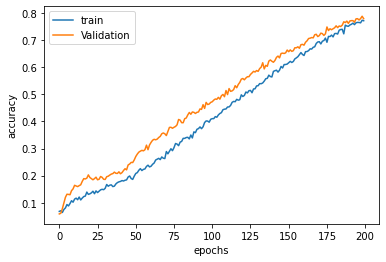

In [ ]:
score = model.evaluate(x_test,verbose=0)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train','Validation'])
plt.show()

In [ ]:
classes = ['BAOLAM', 'HOAILINH', 'HUAVIVAN', 'HUY KHANH', 'HUYNH PHUONG', 'KIEUMINHTUAN', 'NGOKIENHUY', 'NHANPHUCVINH', 'QUOCTRUONG', 'TUANTRAN', 'TRUONGGIANG', 'TRANTHANH', 'SONTUNG', 'THAI VU', 'LUONGTHETHANH']
print(labels)

['BAOLAM', 'HOAILINH', 'HUAVIVAN', 'HUY KHANH', 'HUYNH PHUONG', 'KIEUMINHTUAN', 'NGOKIENHUY', 'NHANPHUCVINH', 'QUOCTRUONG', 'TUANTRAN', 'TRUONGGIANG', 'TRANTHANH', 'SONTUNG', 'THAI VU', 'LUONGTHETHANH']


Tỉ lệ so sánh: [[0.003778   0.00308194 0.02259744 0.05649987 0.01481718 0.06192553
  0.00218902 0.56230885 0.06126277 0.00940481 0.02837718 0.00609142
  0.0164403  0.0529917  0.09823406]]
Giống với: NHANPHUCVINH nhất, độ chính xác là: 56.23088479042053 %


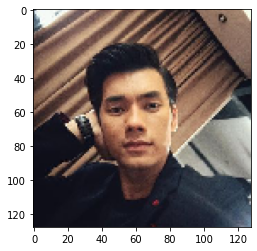

In [ ]:
# import matplotlib.pyplot as plt
# import numpy as np
# img = load_img('2.jpg', target_size=(128,128))
# plt.imshow(img)
# imgRe = img_to_array(img)
# imgRe = imgRe.reshape(1,128,128,3)  
# imgRe = imgRe.astype('float32')
# imgRe /= 255
# y_pred = model.predict(imgRe)
# a = y_pred.max()
# a = a*100

# print("Tỉ lệ so sánh:",y_pred)
# y_classes = [np.argmax(element) for element in y_pred]
# y_classes
# print("Giống với:",classes[y_classes[0]], "nhất, độ chính xác là:",a,"%")
import numpy as np
img = load_img('72.jpg', target_size = (128,128))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,128,128,3) 
img = img.astype('float32')
img = img/255
y_pred = model.predict(img)
a = y_pred.max()
a = a*100

print("Tỉ lệ so sánh:",y_pred)
y_classes = [np.argmax(element) for element in y_pred]
y_classes
print("Giống với:",labels[np.argmax(model.predict(img))], "nhất, độ chính xác là:",a,"%")
